## A Movie Recommender System

## Author:
### Robert Johnson

## Introduction 

### Movies, also known as films, are a type of visual comminication, which uses moving pictures and sounds to tell stories. The cinema, the entertainment industry has been a promininent factor by continuously influencing and defining our lives through producing movies that cater to us during different age groups. We remember growing up watching animated, Disney, movies, such as Lion King, during our childhood, to watching movies as teenagers, such as Harry Potter, to your 20's, such as Dark Knight. Despite your career path, friend circle, race, religion, age, one of the common themes everyone could come together and talk about is movies- it is hard to miss. While discussing ideas about what we would be interested in researching for this project, the topic of movies was brought up by Esmond. We immediately agreed on the topic because we started reminiscing about the 80's, 90's, 20's, and all the different movie eras. Enjoying our conversation and thinking about our fond memories of growing up around watching movies with friends and families, we knew movies was the topic we would want to focus on. 

## Objective

### The objective of this project is to build a movie recommender system. We are building a movie recommendation system to help recommend movies on interests to the customers based on how they have rated the movies they have watched in our data set.


## Stakeholder

### Growing up in an era of technology, it is impossible to ignore the technological advances made in every single industry, including entertainment. We went from an age where you could only watch movies in theaters, to renting movies from companies like blockbuster, to being able to watch movies avialable 24/7 with the help of companies like Netflix. Netflix, found in 1997 went from being the world's first online DVD rental system, to almost selling the entire business to Blockbuster, at the time, to, now, claiming 44% of the total online movie business. We would imagine a company, such as Netflix, being the stakeholder for our project. Our movie recommendation system would be of interest to Netflix, because it would be able to recommend movies to its user in a unique manner using our algorithm.

## Background Research

### MovieLens provides a movie recommender system for users, but without providing the method behind. There are couple of short tutorials build recommender system using MovieLens dataset, so far from what we have explored, none of them develop such system using a scoring system and our scoring system is unique and 100% original from the authors of this report

## Data Selection

### For this project, we wanted to find a data set which provided us with plenty of observations and multiple variables. After a lot of research we came across a data set from MovieLens. This data set fit the criteria our criteria of providing us with 100,000+ observations, and 6 variables. This data set was collected over a period of time, you can notice the movies that are rated in this data set range from the mid 1900's to early 2000's, providing us with a variety of movies for us to do analysis on.

In [1]:
import numpy as np
import math
import pandas as pd
import os, time, re
import pickle, gzip, datetime
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
import glob
os.getcwd()
%matplotlib inline

In [2]:
#data prep and model evaluation

from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
import lightgbm as lgb
import time

In [3]:
#TensorFlow and Keras

import tensorflow as tf
import keras
import scipy
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda, Embedding, Flatten
from keras import regularizers
from keras.losses import mse, binary_crossentropy
import tensorflow.compat.v1 as tf
from scipy.sparse.linalg import svds
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import sklearn

## I am adding the csv file

In [5]:
current_path = os.getcwd()
file = "C:/Users/Robert/Desktop/Ml-20/ml-20m/ratings.csv"

ratings_data = pd.read_csv("C:/Users/Robert/Desktop/Ml-20/ml-20m/ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
movie_names = pd.read_csv("C:/Users/Robert/Desktop/Ml-20/ml-20m/movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratingDF = pd.merge(ratings_data, movie_names, on='movieId')

## Here let us explore the data

In [8]:
ratingDF.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [9]:
ratingDF.shape

(20000263, 6)

In [10]:
ratingDF.info

<bound method DataFrame.info of           userId  movieId  rating   timestamp  \
0              1        2     3.5  1112486027   
1              5        2     3.0   851527569   
2             13        2     3.0   849082742   
3             29        2     3.0   835562174   
4             34        2     3.0   846509384   
...          ...      ...     ...         ...   
20000258  138301   121017     3.5  1420558479   
20000259  138301   121019     4.5  1420558606   
20000260  138301   121021     4.5  1420558687   
20000261  138406   110167     4.5  1396184127   
20000262  138406   110510     4.5  1397597539   

                                                      title  \
0                                            Jumanji (1995)   
1                                            Jumanji (1995)   
2                                            Jumanji (1995)   
3                                            Jumanji (1995)   
4                                            Jumanji (1995)   
.

In [11]:
ratingDF.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy
5,54,2,3.0,974918176,Jumanji (1995),Adventure|Children|Fantasy
6,88,2,1.0,1098277938,Jumanji (1995),Adventure|Children|Fantasy
7,91,2,3.5,1112061358,Jumanji (1995),Adventure|Children|Fantasy
8,116,2,2.0,1132728068,Jumanji (1995),Adventure|Children|Fantasy
9,119,2,4.0,845110667,Jumanji (1995),Adventure|Children|Fantasy


In [12]:
ratingDF.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)                               2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013)    3.666667
$ (Dollars) (1971)                                             2.833333
$5 a Day (2008)                                                2.871795
$9.99 (2008)                                                   3.009091
Name: rating, dtype: float64

In [13]:
ratingDF.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Stealing a Nation (2004)                                 5.0
Human Behavior Experiments, The (2006)                   5.0
Boys Diving, Honolulu (1901)                             5.0
Rigoletto (1993)                                         5.0
Paying the Price: Killing the Children of Iraq (2000)    5.0
Name: rating, dtype: float64

In [14]:
ratingDF.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

## Next I changed the data types to allow them to be used in my model 

In [15]:
ratingDF.userId = ratingDF.userId.astype(str).astype(int)
ratingDF.movieId = ratingDF.movieId.astype(str).astype(int)
ratingDF.rating = ratingDF.rating.astype(str).astype(float)

In [16]:
ratingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 915.5+ MB


In [17]:
ratingDF.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


## More data exploring and cleaning

### Age is very skewed and needs to be normalized

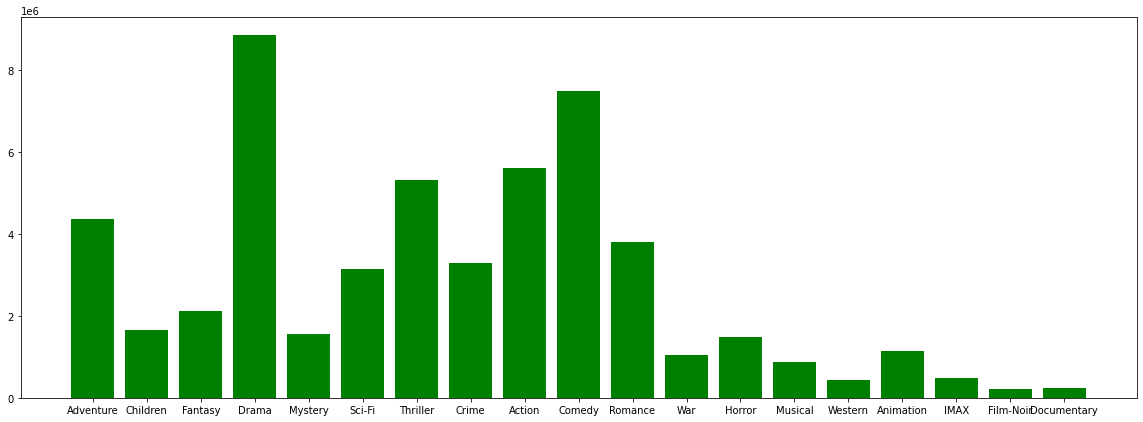

In [18]:
plt.figure(figsize=(20,7))
generlist = ratingDF['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='g');

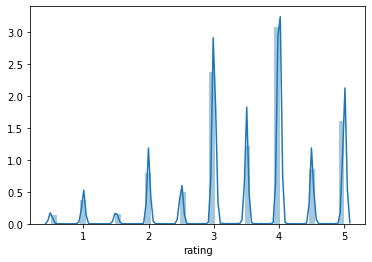

In [20]:
sns.distplot(ratingDF["rating"]);

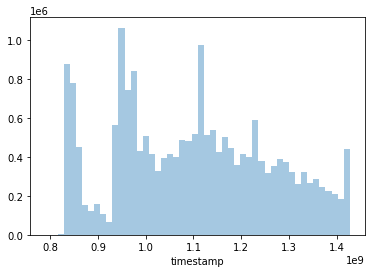

In [21]:
sns.distplot(ratingDF.timestamp.dropna(), kde=False);

## To normalize the average movie rating I will replace 0 with none

In [22]:
ratingDF.rating = ratingDF.rating.replace(0, None)

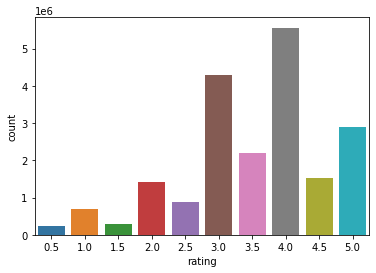

In [23]:
sns.countplot(x='rating', data=ratingDF);

In [24]:
print('Average move rating: ', round(ratingDF['rating'].mean(), 2))

Average move rating:  3.53


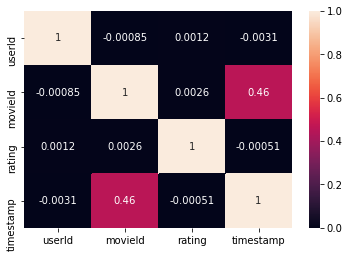

In [25]:
corrMatrix = ratingDF.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Now I will determine the unique number of entries that will make up the training and test data sets

In [26]:
n_users = ratingDF.userId.unique().shape[0]
n_movies = ratingDF.movieId.unique().shape[0]
n_ratings = len(ratingDF)
avg_ratings_per_user = n_ratings/n_users

In [27]:
print('Number of unique users', n_users)
print('Number of unique books', n_movies)
print('Total number of ratings', n_ratings)
print('Average number of ratings per user', avg_ratings_per_user)

Number of unique users 138493
Number of unique books 26744
Total number of ratings 20000263
Average number of ratings per user 144.4135299257002


### Next l will lower sample size to 1200

In [28]:
movieIndex = ratingDF.groupby("movieId").count().sort_values(by="rating", ascending=False)[0:1200].index
rating2 = ratingDF[ratingDF.movieId.isin(movieIndex)]
rating2.count()

userIndex = rating2.groupby('userId').count().sort_values(by="rating", ascending=False).sample(n=1200, random_state=88).index
rating3 = rating2[rating2.userId.isin(userIndex)]
rating3.count()

movies = rating3.movieId.unique()
moviesDF = pd.DataFrame(data=movies, columns=['orginalmovieId'])
moviesDF['newmovieId'] = moviesDF.index+1

users = rating3.userId.unique()
usersDF = pd.DataFrame(data=users, columns=['orginaluserId'])
usersDF['newuserId'] = usersDF.index+1

rating3 = rating3.merge(moviesDF, left_on='movieId',  right_on='orginalmovieId')

rating3.drop(labels='orginalmovieId', axis=1, inplace=True)

rating3 = rating3.merge(usersDF, left_on='userId', right_on='orginaluserId')

rating3.drop(labels='orginaluserId', axis=1, inplace=True)

In [29]:
print(rating3.count())

userId        112401
movieId       112401
rating        112401
timestamp     112401
title         112401
genres        112401
newmovieId    112401
newuserId     112401
dtype: int64


In [30]:
n_users = rating3.userId.unique().shape[0]
n_movies = rating3.movieId.unique().shape[0]
n_ratings = len(rating3)
avg_ratings_per_user = n_ratings/n_users

In [31]:
print('Number of unique users', n_users)
print('Number of unique movies', n_movies)
print('Total number of ratings', n_ratings)
print('Average number of ratings per user', avg_ratings_per_user)

Number of unique users 1200
Number of unique movies 1200
Total number of ratings 112401
Average number of ratings per user 93.6675


#### Now we want the format of our ratings matrix to be one row per user and one column per movie. To do so, we willl pivot ratings to get that and call the new variable Ratings (with a capital *R).

In [32]:
Ratings = rating3.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)

#### Last but not least, we need to de-normalize the data (normalize by each users mean) and convert it from a dataframe to a numpy array

In [33]:
R = np.asmatrix(Ratings.values) 
#print(R)
user_ratings_mean = np.mean(R, axis = 1)
#print(user_ratings_mean.shape)
#print(user_ratings_mean.size)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1) ## Making the user_ratings_mean vertical by reshaping

In [34]:
sparsity = round(1.0 - len(rating3) / float(n_users * n_movies), 3)
print('The sparsity level of the dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of the dataset is 92.2%


### Scipy and Numpy both have functions to do the singular value decomposition. I’m going to use the Scipy function svds because it let’s me choose how many latent factors I want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [35]:
U, sigma, Vt = svds(Ratings, k = 100)

In [36]:
print('Size of sigma: ' , sigma.size)

Size of sigma:  100


### As I’m going to leverage matrix multiplication to get predictions, I’ll convert the Sum (now are values) to the diagonal matrix form.

In [37]:
sigma = np.diag(sigma)

In [38]:
print('Shape of sigma: ', sigma.shape)
print(sigma)

Shape of sigma:  (100, 100)
[[ 52.11466215   0.           0.         ...   0.           0.
    0.        ]
 [  0.          52.43935898   0.         ...   0.           0.
    0.        ]
 [  0.           0.          52.65972016 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 234.86600262   0.
    0.        ]
 [  0.           0.           0.         ...   0.         264.97185863
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  636.64760608]]


In [39]:
print('Shape of U: ', U.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (1200, 100)
Shape of Vt:  (100, 1200)


#### I now have everything I need to make movie ratings predictions for every user. I can do it all at once by following the math and matrix multiply U, Sum, and V^T back to get the rank k = 50 approximation of A.

#### But first, I need to add the user means back to get the actual star ratings prediction.

In [40]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [41]:
print('All user predicted rating : ', all_user_predicted_ratings.shape)

All user predicted rating :  (1200, 1200)


#### With the predictions matrix for every user, we can build a function to recommend movies for any user. We return the list of movies the user has already rated, for the sake of comparison.

In [42]:
print('Rating Dataframe column names', Ratings.columns)

Rating Dataframe column names Int64Index([    1,     2,     3,     5,     6,     7,    10,    11,    14,
               16,
            ...
            76251, 77561, 78499, 79132, 80463, 81591, 81845, 89745, 91529,
            99114],
           dtype='int64', name='movieId', length=1200)


In [43]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movieId,1,2,3,5,6,7,10,11,14,16,...,76251,77561,78499,79132,80463,81591,81845,89745,91529,99114
0,6.559302,1.757697,0.482170,0.872076,0.509830,0.697081,2.976020,1.042342,0.499399,1.454533,...,1.278239,0.922927,0.756041,0.466786,0.993205,0.815785,0.760121,1.290980,1.478038,0.949495
1,0.151014,0.254994,0.480718,0.302252,0.176299,-0.202774,-0.742226,-0.726247,0.369260,0.281866,...,0.126826,0.453743,0.059608,-0.051221,0.396083,0.301666,0.043455,-0.435077,-0.314200,-0.307537
2,0.932169,0.196502,-0.038445,0.031548,-0.276534,0.505386,-0.126713,-0.059817,0.340507,0.160002,...,0.396815,0.245714,1.163325,2.799535,0.964277,1.397603,0.722184,0.967533,0.760296,0.765640
3,0.212598,0.725807,0.280377,0.589907,0.749680,0.294873,1.463197,1.197808,0.224493,1.140521,...,0.358639,0.312670,-0.016246,0.592838,0.087147,0.196339,0.147270,0.098349,0.067237,0.092485
4,0.213226,0.252179,0.321504,0.590974,-0.612023,0.575544,-0.021675,0.087825,0.144532,-0.129406,...,0.244307,0.078250,0.254014,-0.027543,0.257231,0.040386,-0.035558,0.058068,0.028157,0.129463


#### Now I write a function to return the movies with the highest predicted rating that the specified user hasn't already rated. Though we didn't use any explicit movie content features, I will merge in that information to get a more complete picture of the recommendations.

In [44]:
def recommend_movies(predictions, userId, movie_names, ratings_data, num_recommendations):
    """
    Implementation of SVD by hand
    :param predictions : The SVD reconstructed matrix, 
    userID : UserId for which you want to predict the top rated movies, 
    movies : Matrix with movie data, original_ratings : Original Rating matrix, 
    num_recommendations : num of recos to be returned
    :return: num_recommendations top movies
    """ 
    # Get and sort the user's predictions
    user_row_number = userId - 1 # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = ratings_data[ratings_data.userId == (userId)]
    user_full = (user_data.merge(movie_names, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userId, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movie_names[~movie_names['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

#### Let's try to recommend 20 movies for user with ID 810

In [45]:
already_rated, predictions = recommend_movies(preds, 810, movie_names, ratings_data,20)

User 810 has already rated 100 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [46]:
# Top 20 movies
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
48,810,1639,5.0,993238226,Chasing Amy (1997),Comedy|Drama|Romance
53,810,1799,5.0,993238295,Suicide Kings (1997),Comedy|Crime|Drama|Mystery|Thriller
75,810,2836,5.0,993237971,Outside Providence (1999),Comedy
32,810,1246,5.0,993238643,Dead Poets Society (1989),Drama
55,810,1961,5.0,993238699,Rain Man (1988),Drama
43,810,1396,5.0,993238113,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi
44,810,1500,5.0,993238500,Grosse Pointe Blank (1997),Comedy|Crime|Romance
87,810,4041,5.0,993238873,"Officer and a Gentleman, An (1982)",Drama|Romance
96,810,4308,5.0,993239018,Moulin Rouge (2001),Drama|Musical|Romance
46,810,1617,5.0,993238310,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller


In [47]:
# Top 20 movies that User 810 will enjoy
predictions

,movieId,title,genres
4797,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5753,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
6941,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
3402,3578,Gladiator (2000),Action|Adventure|Drama
2417,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4767,4963,Ocean's Eleven (2001),Crime|Thriller
4799,4995,"Beautiful Mind, A (2001)",Drama|Romance
345,356,Forrest Gump (1994),Comedy|Drama|Romance|War
6329,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
5221,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller


In [51]:
already_rated, predictions = recommend_movies(preds, 1100, movie_names, ratings_data,20)

User 1100 has already rated 48 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [52]:
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
21,1100,288,5.0,837370706,Natural Born Killers (1994),Action|Crime|Thriller
2,1100,21,5.0,837371093,Get Shorty (1995),Comedy|Crime|Thriller
46,1100,593,5.0,837370612,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
29,1100,319,5.0,837370936,Shallow Grave (1994),Comedy|Drama|Thriller
25,1100,296,5.0,837369990,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
22,1100,290,5.0,837370936,Once Were Warriors (1994),Crime|Drama
0,1100,10,4.0,837370662,GoldenEye (1995),Action|Adventure|Thriller
43,1100,589,4.0,837370990,Terminator 2: Judgment Day (1991),Action|Sci-Fi
36,1100,380,4.0,837369993,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
35,1100,367,4.0,837371135,"Mask, The (1994)",Action|Comedy|Crime|Fantasy


In [53]:
predictions

,movieId,title,genres
6993,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
5805,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
1121,1193,One Flew Over the Cuckoo's Nest (1975),Drama
4849,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
2825,2959,Fight Club (1999),Action|Crime|Drama|Thriller
1132,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller
795,858,"Godfather, The (1972)",Crime|Drama
1065,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
4084,4226,Memento (2000),Mystery|Thriller
839,904,Rear Window (1954),Mystery|Thriller


In [88]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_validate


train_data, test_data = train_test_split(Ratings, test_size=0.3)

In [89]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.values
test_data_matrix = test_data.values

In [90]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0

In [91]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 2.7501251498817356
Item-based CF RMSE: 2.990641478787692
